In [36]:
# basic packages
import os, math, csv, scipy, time, random
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

# Model Preprocessing
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer,
    Binarizer
)

# Preprocessing
from sklearn import preprocessing
from sklearn import utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model selection/evaluation
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import (
    train_test_split,
    cross_val_predict,
    cross_val_score,
    cross_val_predict,
    GridSearchCV,
    RandomizedSearchCV,
    KFold,
    cross_validate,
    learning_curve,
    LeaveOneOut,
)xw
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Stats
import scipy.stats as stats


In [3]:
# Machine Learning
# Regressor functions

import xgboost as xgb

import sklearn.linear_model as lm
import sklearn.ensemble as ens

# SGD regressor, Lasso, ElasticNet, Ridgeregression, SVR(kernel='linear'), SVT(kernel='rbf'), Ensemble Regressor


array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

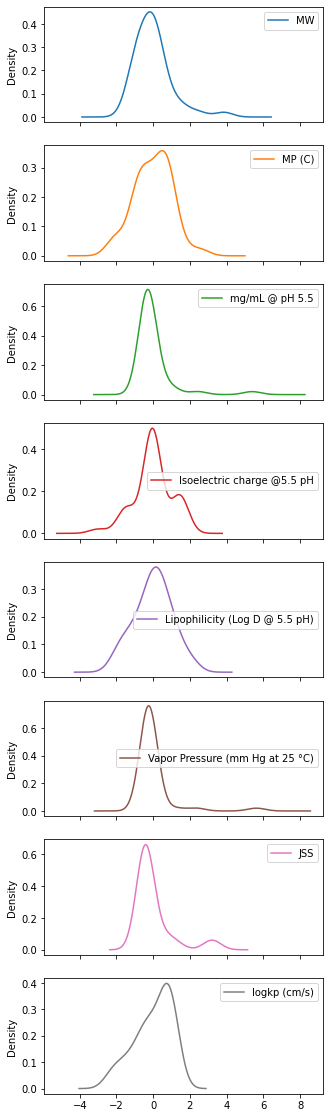

In [93]:
training_data = "JSS_Training_Data_3.xlsx"

df = pd.read_excel(training_data, index_col="Molecule").dropna()

# Split data into input and predicted variables

y = df["JSS"]
X = df.drop(["JSS"], axis=1)

# split data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# look at z-scored distribution of data

df_z = df.apply(stats.zscore)
df_z.plot(kind="kde", subplots=True, figsize=(5, 20), sharex=True)


In [5]:
df.describe()


,MW,MP (C),mg/mL @ pH 5.5,Isoelectric charge @5.5 pH,Lipophilicity (Log D @ 5.5 pH),Vapor Pressure (mm Hg at 25 °C),JSS,logkp (cm/s)
count,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01,41.000000,41.000000
mean,260.723659,134.813415,295.066005,0.021351,0.877073,5.241377e-01,40.367628,-6.768195
std,132.515871,105.000927,834.812159,0.669346,2.135740,2.065516e+00,83.276658,1.265738
min,90.120000,-95.000000,0.001000,-1.960000,-3.640000,0.000000e+00,0.000130,-9.653000
25%,179.220000,59.000000,0.410000,-0.001000,-0.550000,0.000000e+00,0.190000,-7.459000
50%,244.260000,148.000000,22.170000,0.000000,0.760000,6.380000e-09,4.076000,-6.397000
75%,289.500000,212.000000,91.270000,0.005500,2.090000,1.160000e-04,26.000000,-5.731000
max,764.900000,404.000000,4742.760000,1.020000,5.400000,1.200000e+01,309.000000,-5.331000


In [6]:
df.corrwith(df["JSS"])


MW                                -0.360513
MP (C)                            -0.407119
mg/mL @ pH 5.5                     0.055061
Isoelectric charge @5.5 pH         0.194729
Lipophilicity (Log D @ 5.5 pH)    -0.114325
Vapor Pressure (mm Hg at 25 °C)   -0.072209
JSS                                1.000000
logkp (cm/s)                       0.292730
dtype: float64

In [8]:
import statsmodels.api as sm

y.shape[0] == X.shape[0], "rows mismatch"

sm.OLS(endog=y, exog=X).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    JSS   R-squared (uncentered):                   0.379
Model:                            OLS   Adj. R-squared (uncentered):              0.251
Method:                 Least Squares   F-statistic:                              2.967
Date:                Thu, 04 Aug 2022   Prob (F-statistic):                      0.0154
Time:                        19:48:28   Log-Likelihood:                         -233.63
No. Observations:                  41   AIC:                                      481.3
Df Residuals:                      34   BIC:                                      493.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
MW                                 -0.1765      0.121     -1.455      0.155      -0.423       0.070
MP (C)                             -0.4401      0.165     -2.671      0.012      -0.775      -0.105
mg/mL @ pH 5.5                      0.0009      0.017      0.049      0.961      -0.035       0.036
Isoelectric charge @5.5 pH         -1.3073     20.203     -0.065      0.949     -42.365      39.751
Lipophilicity (Log D @ 5.5 pH)     -1.4069      6.239     -0.226      0.823     -14.085      11.272
Vapor Pressure (mm Hg at 25 °C)   -15.4400      7.354     -2.100      0.043     -30.385      -0.495
logkp (cm/s)                      -22.1560      6.117     -3.622      0.001     -34.588      -9.724
==============================================================================
Omnibus:                       22.107   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.331
Skew:                           1.680   Prob(JB):                     1.57e-07
Kurtosis:                       5.654   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

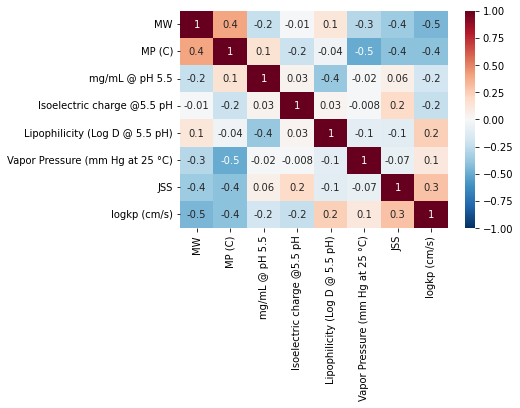

In [7]:
# sns.pairplot(data_clean.reset_index())
sns.heatmap(df.corr(), annot=True, cmap="RdBu_r", fmt=".1g", vmin=-1, vmax=1)


In [94]:
# Choosing a model

regressors = [
    ens.GradientBoostingRegressor(),
    ens.ExtraTreesRegressor(),
    ens.RandomForestRegressor(),
    ens.AdaBoostRegressor(),
    lm.LinearRegression(),
    lm.Lasso(),
    lm.Ridge(),
    lm.ElasticNet(),
    lm.SGDRegressor(),
    ens.BaggingRegressor(),
    xgb.XGBRegressor(),
]


In [117]:
Scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    MaxAbsScaler(),
    QuantileTransformer(),
    PowerTransformer(),
    Normalizer(),
    Binarizer(),
]


In [95]:
# Printing model scores

head = 10
for model in regressors[:head]:
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    start = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean squared error:", mean_squared_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()


GradientBoostingRegressor()
	Training time: 0.028s
	Prediction time: 0.001s
	Mean squared error: 1809.8627582508093
	R2 score: -0.2671164189333448

ExtraTreesRegressor()
	Training time: 0.069s
	Prediction time: 0.009s
	Mean squared error: 1530.3312876129737
	R2 score: -0.07141157090602213

RandomForestRegressor()
	Training time: 0.090s
	Prediction time: 0.007s
	Mean squared error: 1355.379742608904
	R2 score: 0.051075050900962204

AdaBoostRegressor()
	Training time: 0.044s
	Prediction time: 0.003s
	Mean squared error: 925.7083257334239
	R2 score: 0.35189548857628483

LinearRegression()
	Training time: 0.002s
	Prediction time: 0.001s
	Mean squared error: 2618.90811753657
	R2 score: -0.8335431569494376

Lasso()
	Training time: 0.002s
	Prediction time: 0.001s
	Mean squared error: 2514.86575360161
	R2 score: -0.7607012870310577

Ridge()
	Training time: 0.002s
	Prediction time: 0.001s
	Mean squared error: 2565.232923514164
	R2 score: -0.7959642193613989

ElasticNet()
	Training time: 0.001s


In [143]:
# Parameters to tune for Grid Search

params = {
    "Transform_Step": [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        MaxAbsScaler(),
        QuantileTransformer(),
        PowerTransformer(),
        Normalizer(),
        Binarizer(),
    ],
    "Model_step__n_estimators": [10, 50, 100, 200],
    "Model_step__learning_rate": [0.1, 0.5, 1, 2],
    "Model_step__loss": ["linear", "square", "exponential"],
}


In [146]:
# Building the pipeline

pipe_search = Pipeline(
    [("Transform_Step", StandardScaler()), ("Model_step", ens.AdaBoostRegressor())]
)


In [147]:
# Search the entire pipeline

R_search = RandomizedSearchCV(pipe_search, params, cv=10, scoring="r2")
R_search.fit(X_train, y_train)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('Transform_Step',
                                              StandardScaler()),
                                             ('Model_step',
                                              AdaBoostRegressor())]),
                   param_distributions={'Model_step__learning_rate': [0.1, 0.5,
                                                                      1, 2],
                                        'Model_step__loss': ['linear', 'square',
                                                             'exponential'],
                                        'Model_step__n_estimators': [10, 50,
                                                                     100, 200],
                                        'Transform_Step': [StandardScaler(),
                                                           MinMaxScaler(),
                                                           RobustScaler(),
                                                           MaxAbsScaler(),
                                                           QuantileTransformer(),
                                                           PowerTransformer(),
                                                           Normalizer(),
                                                           Binarizer()]},
                   scoring='r2')

In [148]:
R_search.best_params_


{'Transform_Step': RobustScaler(),
 'Model_step__n_estimators': 10,
 'Model_step__loss': 'square',
 'Model_step__learning_rate': 0.1}

In [149]:
# Cross Validate the Entire Pipeline

cross_val_score(pipe_search, X_train, y_train, cv=10, scoring="r2").mean()


-53.99400144068828

In [150]:
# Fitting and predicting the pipeline
model = ens.AdaBoostRegressor(n_estimators=50, learning_rate=1.5, loss="square")
model.fit(X_train, y_train)
model.predict(X_test).mean()


48.82111111111111

In [151]:
# Scoring the pipeline
model.score(X_test, y_test)


-1.5586301022448978

In [20]:
# Printing coefficients and intercept to create function later
print('Model_step'.coef_)
print(.intercept_)

AttributeError: 'str' object has no attribute 'coef_'

In [ ]:
# Function to determine JSS value with input values, this is the final goal, to input a molecules parameters and get the JSS value

coefficients = pipe.coef_
intercept = pipe.intercept_


def calculate_JSS(MW_in, MP_in, Sol_in, Iso_in, Lipo_in, Vapo_in, logkp_in):
    return (
        (MW_in * coefficients[0])
        + (MP_in * coefficients[1])
        + (Sol_in * coefficients[2])
        + (Iso_in * coefficients[3])
        + (Lipo_in * coefficients[4])
        + (Vapo_in * coefficients[5])
        + (logkp_in * coefficients[6])
        + intercept
    )
